<a href="https://colab.research.google.com/github/jesspaulillo/data-science-/blob/main/Paulillo_Stats_Lab_Linear_Model_Photo_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
%%capture 
!pip install wandb 
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests # allows you to send requests as well as to import them 
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np # import something to recieve a random outcome 
import torch 
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [53]:
def GPU(data): # graphics processing unit 
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x): # displaying certain x values and plotting them 
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray') #displaying an image to show up as grey
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/" # url for presentation 
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url) # url to access google slides 
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image): # function to show how to load an image 

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [54]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [55]:
url = "https://docs.google.com/presentation/d/1lyE52a0yLCu9iUiKeFmdKayGJhu2Z6fyToXEMKeigoY/edit#slide=id.p" # url to display presentation of images 

In [56]:
url= "https://docs.google.com/presentation/d/1LRW3bq0aNYzaZfv_IblLcg3oUieLCudkLGOqPo97MIM/edit#slide=id.p"

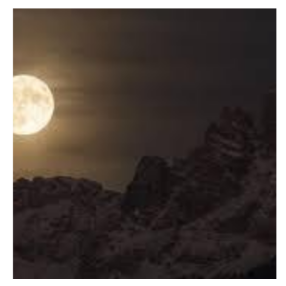

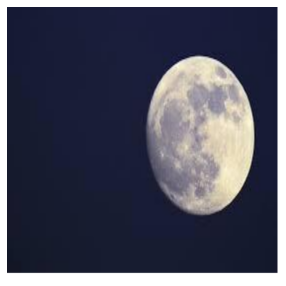

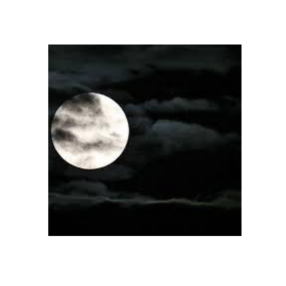

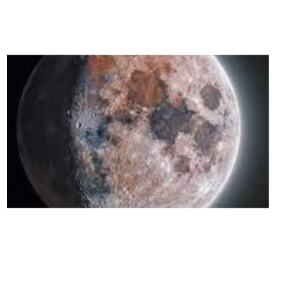

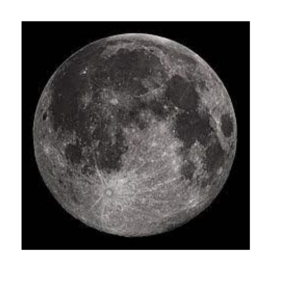

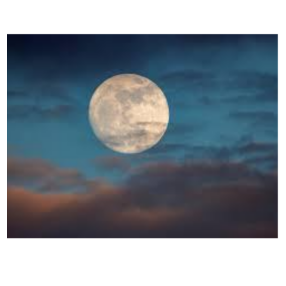

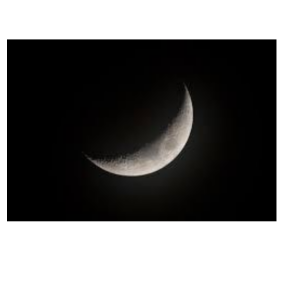

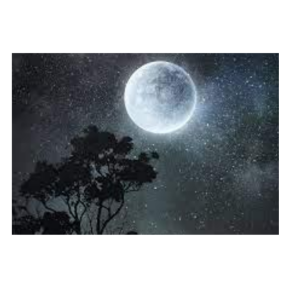

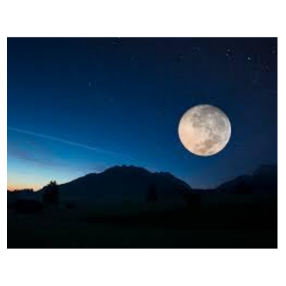

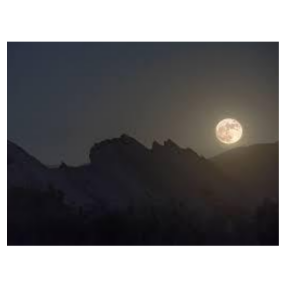

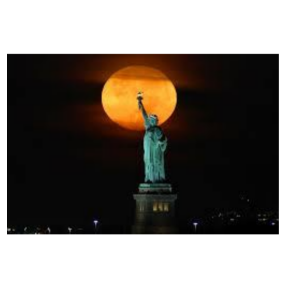

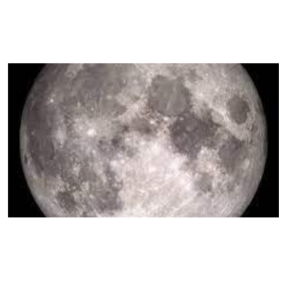

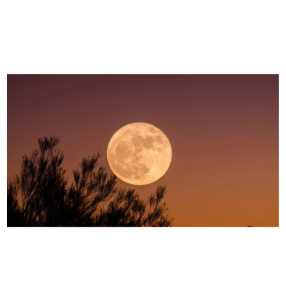

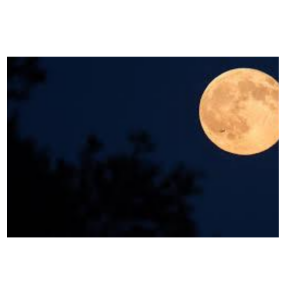

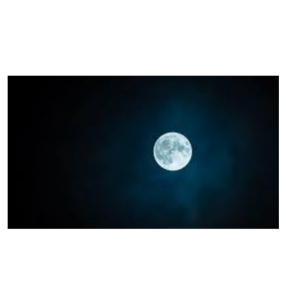

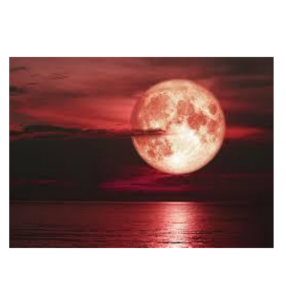

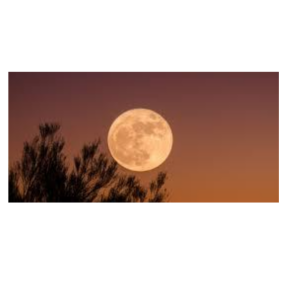

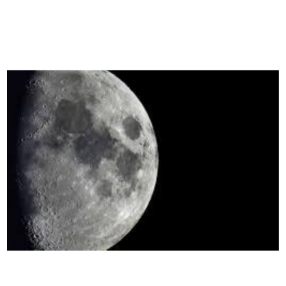

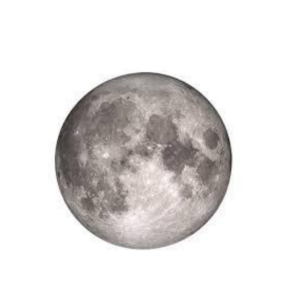

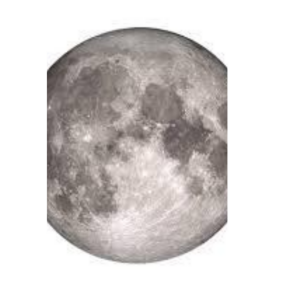

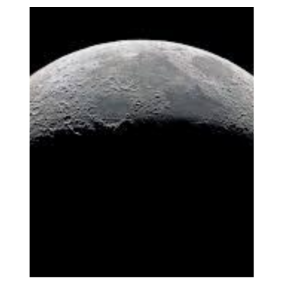

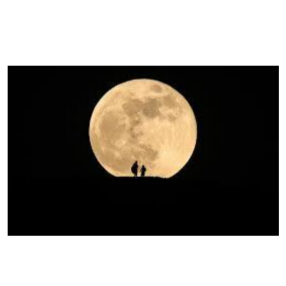

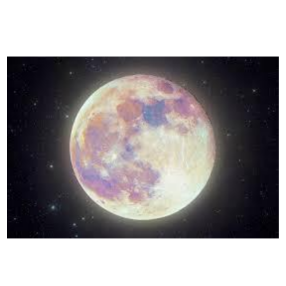

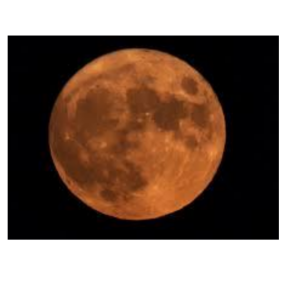

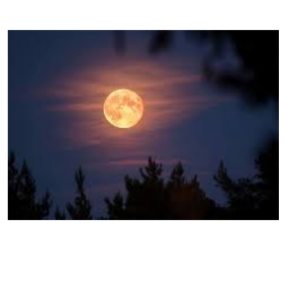

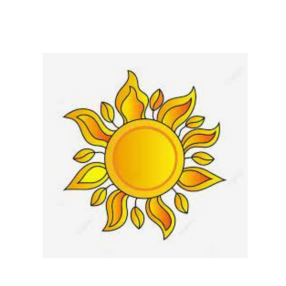

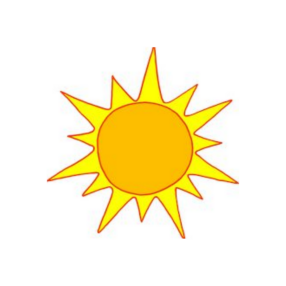

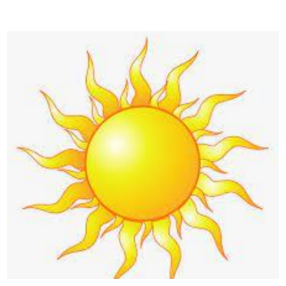

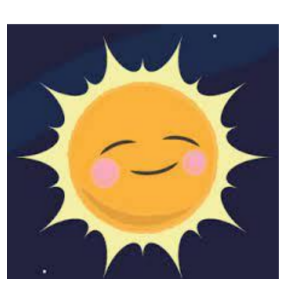

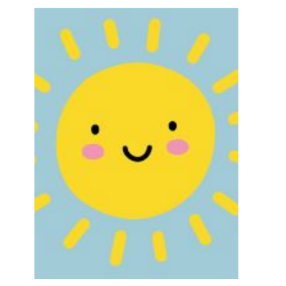

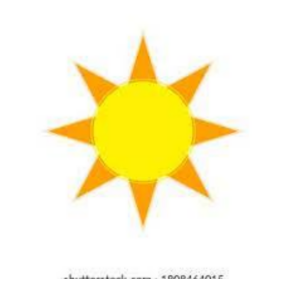

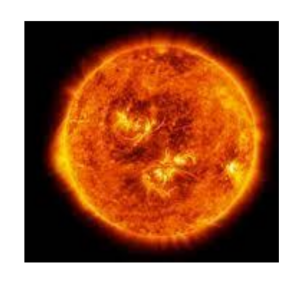

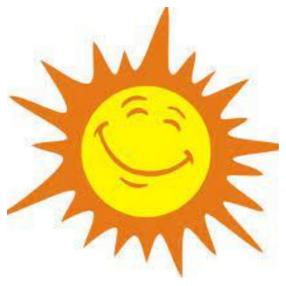

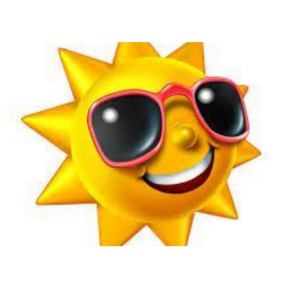

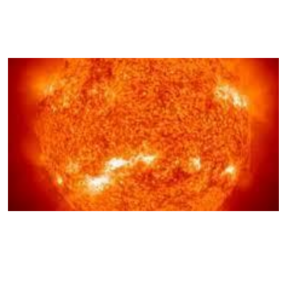

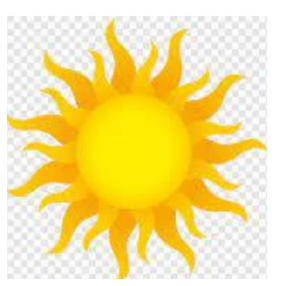

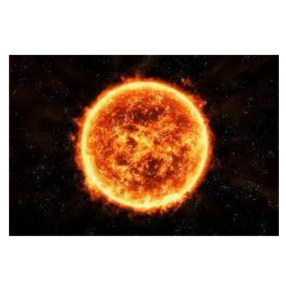

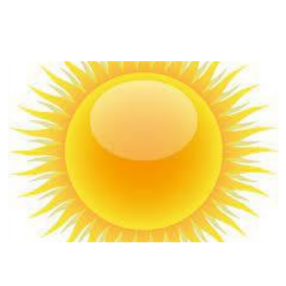

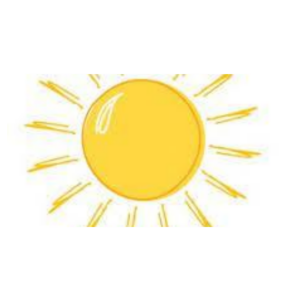

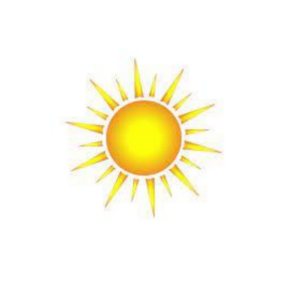

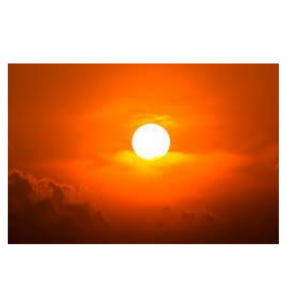

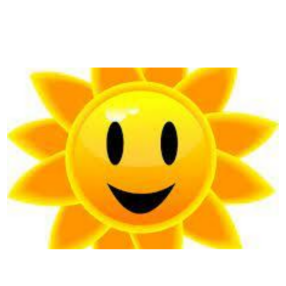

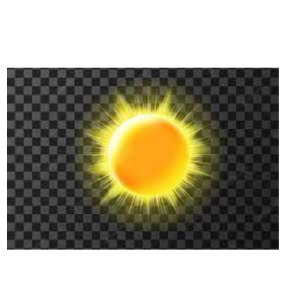

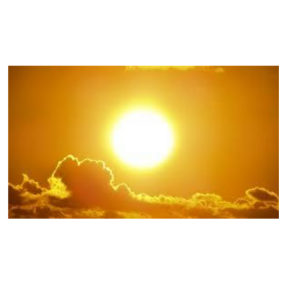

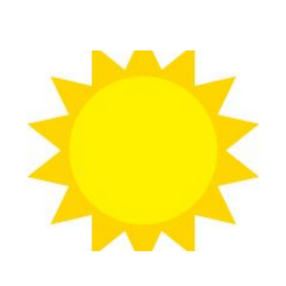

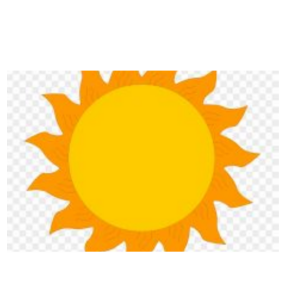

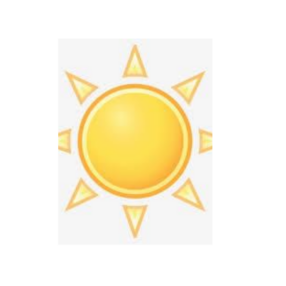

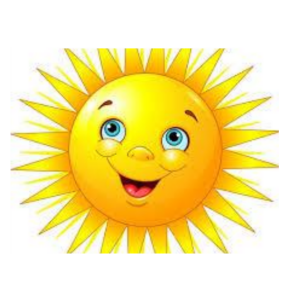

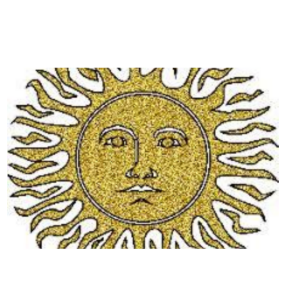

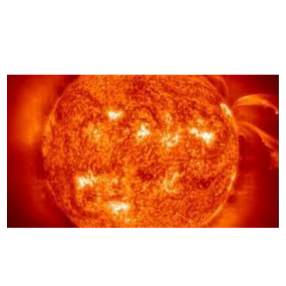

In [57]:
images = []

for image in get_slides(url): # code to display slides of images 

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [58]:
images.shape # line to start a function to create images 

torch.Size([50, 3, 224, 224])

In [59]:
model(images) # creating images with certain numerical codes 

tensor([[-0.0552,  0.4262, -2.8475,  ...,  0.0457, -0.1723,  0.5013],
        [ 1.5149,  0.5450,  0.8651,  ...,  3.3718,  3.0998,  4.7908],
        [-1.9740, -3.2247, -2.1572,  ..., -2.2949, -0.3029,  2.8771],
        ...,
        [-2.7130,  5.5829, -5.5799,  ..., -3.6193,  4.4838,  2.8305],
        [-0.6293,  2.0884, -5.9396,  ..., -0.2140,  1.6295, -0.3171],
        [-3.6038,  4.7709, -4.7004,  ...,  1.1384,  2.4497,  2.8828]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [60]:
y = model(images) # given a value to y 

In [61]:
y.shape

torch.Size([50, 1000])

In [62]:
guesses = torch.argmax(y, 1).cpu().numpy() # displaying the possible values for "guesses"

In [63]:
for i in list(guesses): # code to display all possible guesses that are given 
    print(labels[i])

curly-coated retriever
golf ball
analog clock
chiton, coat-of-mail shell, sea cradle, polyplacophore
chime, bell, gong
golf ball
cleaver, meat cleaver, chopper
bubble
cleaver, meat cleaver, chopper
cleaver, meat cleaver, chopper
table lamp
mortar
analog clock
ping-pong ball
cleaver, meat cleaver, chopper
buckeye, horse chestnut, conker
analog clock
mortar
gong, tam-tam
breastplate, aegis, egis
golf ball
golf ball
projector
gong, tam-tam
television, television system
hair slide
pinwheel
lemon
jack-o'-lantern
wall clock
pinwheel
pick, plectrum, plectron
centipede
binoculars, field glasses, opera glasses
ice lolly, lolly, lollipop, popsicle
goldfish, Carassius auratus
orange
orange
face powder
daisy
candle, taper, wax light
whistle
rock beauty, Holocanthus tricolor
pill bottle
pinwheel
honeycomb
gong, tam-tam
pinwheel
sombrero
meat loaf, meatloaf


In [64]:
Y = np.zeros(50,) # creating an array of given shapes 
Y[25:] = 1

In [65]:
X = y.detach().cpu().numpy() 

In [66]:
X.shape

(50, 1000)

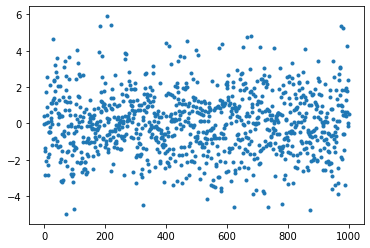

In [67]:
plt.plot(X[0],'.') # displaying a graph plotting certain measurements

In [68]:
X[0] # possible x values 

array([-5.51503897e-02,  4.26171660e-01, -2.84753704e+00, -1.52376246e+00,
       -1.33796597e+00,  1.69833434e+00, -2.04641390e+00,  4.38285545e-02,
        4.40362990e-01,  2.56488562e+00,  8.96000504e-01, -2.28489542e+00,
       -1.82966685e+00,  5.95962480e-02, -2.85192323e+00, -4.92671669e-01,
       -4.71362323e-01, -1.66726518e+00, -4.74958390e-01, -2.24371076e-01,
        2.10118818e+00,  6.20579302e-01,  2.87202060e-01,  1.13473892e+00,
        1.39607370e-01, -1.17452896e+00,  1.14322007e+00, -2.86784768e-02,
       -8.77814710e-01,  4.63712215e+00,  1.29961789e+00,  2.32003474e+00,
        2.40128970e+00,  1.38130987e+00,  1.79852378e+00,  7.77467489e-01,
        3.23641920e+00, -8.21143627e-01,  2.83481216e+00,  1.11308670e+00,
       -1.20378613e+00, -9.54960346e-01,  2.55126762e+00,  3.59228516e+00,
        5.44448256e-01, -6.33274540e-02, -1.32407486e+00,  2.04879665e+00,
        3.64703715e-01,  1.28874373e+00,  5.12719810e-01,  2.04719281e+00,
       -1.26272678e+00, -

In [69]:
np.argmax(X[0]) # function to display an element of an array

206

In [70]:
labels # dispplaying all of the possible labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

In [71]:
top_ten = np.argsort(X[0])[::-1][0:10] 

In [72]:
for i in top_ten:
  print(labels[i]) # displaying the top labels that it found to be the most similar to 

curly-coated retriever
Irish water spaniel
Kerry blue terrier
geyser
volcano
nipple
mortar
axolotl, mud puppy, Ambystoma mexicanum
candle, taper, wax light
abaya


(array([  8.,  44., 105., 200., 255., 213., 112.,  39.,  18.,   6.]),
 array([-4.9857125 , -3.897707  , -2.8097014 , -1.7216958 , -0.6336902 ,
         0.45431542,  1.542321  ,  2.6303265 ,  3.7183323 ,  4.806338  ,
         5.8943434 ], dtype=float32),
 <a list of 10 Patch objects>)

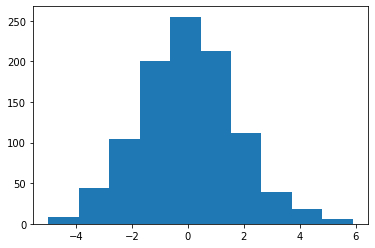

In [73]:
plt.hist(X[0])

In [75]:
X = GPU_data(X) # displaying x and y values to the data 
Y = GPU_data(Y)

<ipython-input-53-30201b030c98>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


In [76]:
def softmax(x): # mathmatical function to convert numbers into probabilities 
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [77]:
def cross_entropy(outputs, labels):  # given labels values such as sizes           
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [78]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [79]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [80]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [81]:
X.shape # given shape a point 

torch.Size([50, 1000])

In [82]:
def get_batch(mode): # given random numbers
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [83]:
def model(x,w): # creating a model through a point of values x,w

    return x@w[0]

In [84]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [86]:
wb.init(project="Linear_Model_Photo_1"); # displaying values to be used through a linear model photo
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


Problem at: <ipython-input-86-977ef8dd57c0> 1 <module>


Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/wandb/sdk/wandb_init.py", line 1078, in init
    run = wi.init()
  File "/usr/local/lib/python3.8/dist-packages/wandb/sdk/wandb_init.py", line 574, in init
    manager._inform_init(settings=self.settings, run_id=self.settings.run_id)
  File "/usr/local/lib/python3.8/dist-packages/wandb/sdk/wandb_manager.py", line 173, in _inform_init
    svc_iface._svc_inform_init(settings=settings, run_id=run_id)
  File "/usr/local/lib/python3.8/dist-packages/wandb/sdk/service/service_sock.py", line 38, in _svc_inform_init
    self._sock_client.send(inform_init=inform_init)
  File "/usr/local/lib/python3.8/dist-packages/wandb/sdk/lib/sock_client.py", line 211, in send
    self.send_server_request(server_req)
  File "/usr/local/lib/python3.8/dist-packages/wandb/sdk/lib/sock_client.py", line 155, in send_server_request
    self._send_message(msg)
  File "/usr/local/lib/python3.8/dist-packages/wandb/sdk/lib/sock_client.py",

Exception: ignored

the best was brisk-shape-7
the worst was jumping butterfly-6 
the average was 0.74036667

https://tensorspace.org/